In [1]:
import os
import pandas as pd

train_data_path ="~/aiffel/240624-dlthon/data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [38]:
print(train_data['class'].value_counts())

기타 괴롭힘 대화      1011
갈취 대화           973
직장 내 괴롭힘 대화     970
협박 대화           892
Name: class, dtype: int64


In [40]:
print(train_data['class'].unique())

['협박 대화' '기타 괴롭힘 대화' '갈취 대화' '직장 내 괴롭힘 대화']


In [29]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_data_path ="~/aiffel/240624-dlthon/data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [8]:
train_data

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...


In [ ]:
# # naver 맞춤법 검사기 사용해보기
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.common.by import By
# import json
# from bs4 import BeautifulSoup
# import time

# def spelling_checker(text):
#     # 맞춤법 검사기 페이지 찾아가기
#     chrome_driver_path = 'C:\Users\soyso\'
#     service = Service(chrome_driver_path)
#     driver = webdriver.Chrome(service=service)
#     try:
#         driver.get("http://www.naver.com")
#         driver.find_element_by_name("query")
#         elem.send_keys("맞춤법 검사기")
#         elem.send_keys(Keys.RETURN)
#         # 검사기 페이지에서 맞춤법 검사를 원하는 텍스트 넣기
#         elem = driver.find_element_by_class_name("txt_gray")
#         time.sleep(2)
#         elem.send_keys(text)
#         # 맞춤법 검사 시작 버튼 누르기
#         elem = driver.find_element_by_class_name("btn_check")
#         time.sleep(1)

#         # 맞춤법 검사 후 결과 가져오기
#         soup = BeautifulSoup(driver.page_source, 'html.parser')
#         corrected_text = soup.select("p.result_text.stand_txt")[0].text
#         return corrected_text
    
#     finally:
#         # 드라이버 종료
#         driver.quit()

    
# # 예시 텍스트
# sample_text = "저는 오늘 그 사람을 만났읍니다. 그리고 그 사람은 매우 친절했읍니다."

# # 맞춤법 검사 적용
# corrected_text = spelling_checker(sample_text)

# print("Original Text:", sample_text)
# print("Corrected Text:", corrected_text)

In [10]:
# 중복된 행을 찾기
duplicates = train_data.duplicated()
print(duplicates)

# 중복된 행의 개수를 세기
num_duplicates = train_data.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

0       False
1       False
2       False
3       False
4       False
        ...  
3945    False
3946    False
3947    False
3948    False
3949    False
Length: 3950, dtype: bool
Number of duplicate rows: 0


In [11]:
print(train_data['conversation'].nunique())

3846


In [12]:
# 중복된 행을 찾기
val_counts = train_data['conversation'].value_counts()

print(val_counts)

저기요. 잠깐만요\n매일 왜이러세요. 전 할말 없어요\n그 쪽이 좋아서요\n전 관심 없어요. 오지 마세요\n한 번만 만나주세요.\n제발 이러지 마세요. 전 남자친구 있어요\n결혼한 건 아니잖아요. 딱 한번만 데이트해요\n내가 왜 그쪽이랑 만나요?\n그 쪽이 내 스타일이에요\n난 아니거든요.                                                                                                                                                        2
야 석탄?\n 내가 왜 석탄이야?\n 얼굴이 까마니까 석탄이지.\n 그만해.\n 너 라이터 불붙이면 아주 잘 타겠다.\n 가 비켜.\n 아주 콧구멍 커지니까 이제 연탄이네.\n 비키라고.\n 야 연탄?\n 제발 좀 그만해. 나 정말 힘들어.                                                                                                                                                                                    2
진용아 내 내 가방 돌려줘\n아하하 진용아? 가방 돌려줄까?\n노 놀리지마\n노 놀리지마\n하아.\n한숨 쉰 거야?\n아 아 아아니야.\n아 아 아 아니야? 하하하하\n아아.\n왜? 기분 나빠?                                                                                                                                                                                                              2
김대리. 이번 주간 회의 발표 준비좀 해줘.\n저 말입니까.?\n응. 너가 해줘\n과장님 저번

In [38]:
print(train_data[train_data['conversation'] == "저기요. 잠깐만요\n매일 왜이러세요. 전 할말 없어요\n그 쪽이 좋아서요\n전 관심 없어요. 오지 마세요\n한 번만 만나주세요.\n제발 이러지 마세요. 전 남자친구 있어요\n결혼한 건 아니잖아요. 딱 한번만 데이트해요\n내가 왜 그쪽이랑 만나요?\n그 쪽이 내 스타일이에요\n난 아니거든요."])

     idx      class                                       conversation
262  262  기타 괴롭힘 대화  저기요. 잠깐만요\n매일 왜이러세요. 전 할말 없어요\n그 쪽이 좋아서요\n전 관심...
932  932  기타 괴롭힘 대화  저기요. 잠깐만요\n매일 왜이러세요. 전 할말 없어요\n그 쪽이 좋아서요\n전 관심...


In [13]:
train_data.drop_duplicates(subset = ['conversation'], inplace=True)
print(len(train_data))

3846


In [15]:
train_data

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...


In [16]:
stopwords = {'이', '그', '저', '의', '가', '을', '를', '은', '는', '에', '와', '과', '도', '으로', '로', '에서', '에게', '뿐'}

In [17]:
# import re

# def preprocess_sentence(sentence, remove_stopwords=True):
#     # 맞춤법 검사
    
#     # 특정 단어는 @~@되어있기 때문에 처리필요.
    
    
#     #형태소 분석
#     sentence = morph_analyze(sentence)
    
# #     # 영어라면 소문자로 변환
# #     sentence = sentence.lower() # 텍스트 소문자화

# #     # 단어와 구두점 사이의 거리를 만들기
# #     sentence = re.sub(r"([?.!])", r" \1", sentence)

# #     # \n을 'ENTER'으로 변환
# #     sentence = re.sub(r'[\n]', " ENTER ", sentence)

# #     # 특수문자 제거 (문장내의 특수 문자제거)
# #     sentence = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z?.!\s]", "", sentence)
    
    
#     # 불용어 제거 (Text)     
#     sentence = ' '.join(word for word in sentence if  word not in stopwords)

#     return sentence

### 데이터셋 일반 대화와 합친 후 다시 확인

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

from konlpy.tag import Okt
from konlpy.tag import Twitter
from soynlp.tokenizer import MaxScoreTokenizer
from soynlp.normalizer import *
import re
import sentencepiece as spm # 가장 성능이 좋았음
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
#import wandb
#from wandb.keras import WandbCallback

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


In [21]:
# 대화의 길이 계산
train_data['conversation_length'] = train_data['conversation'].apply(lambda x: len(x))

In [26]:
print(np.min(train_data['conversation_length']), np.max(train_data['conversation_length']))

41 874


문장의 최단 길이: 41
문장의 최장 길이: 874
문장의 평균 길이: 227


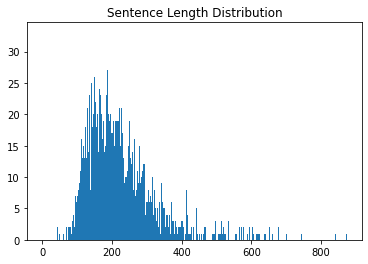

In [33]:
min_len = 999
max_len = 0
sum_len = 0

for sen in train_data['conversation_length']:
    length = sen
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(train_data['conversation_length']))

sentence_length = np.zeros((max_len), dtype=int)

for sen in train_data['conversation_length']:
    sentence_length[sen-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0,)
plt.title("Sentence Length Distribution")
plt.show()

In [34]:
train_data.head()

,idx,class,conversation,conversation_length
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,242
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,188
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,218
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,115
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,460


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

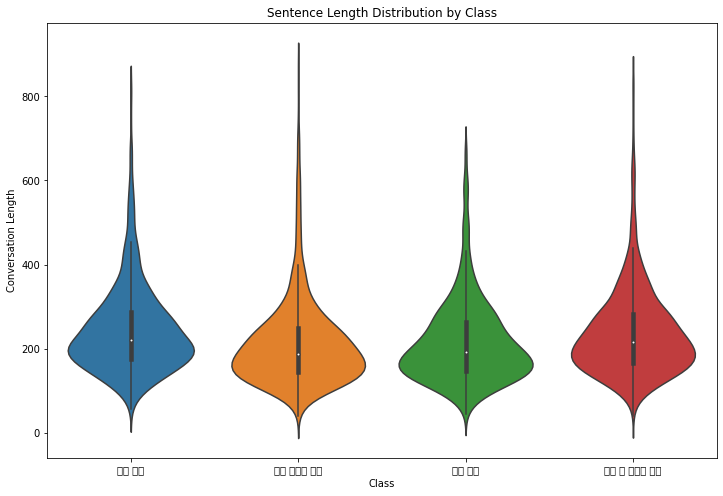

In [35]:
# 대화의 길이 계산
train_data['conversation_length'] = train_data['conversation'].apply(lambda x: len(x))

# 각 클래스별로 데이터 나누기
class_labels = train_data['class'].unique()

# Seaborn의 muted 팔레트와 비슷한 색상 생성
custom_palette = sns.color_palette("muted")

# 클래스별 violinplot 그리기
plt.figure(figsize=(12, 8))
sns.violinplot(x='class', y='conversation_length', data=train_data, split=True)
plt.title("Sentence Length Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Conversation Length")
plt.show()